# Sentiment analysis
The script aims to explore the datasets

- Sentiment_chatgptfirst.csv ("datasets/sentiment_chatgptfirst.csv")
- Sentiment_chatgpt2last.csv ("datasets/sentiment_chatgpt2last.csv")

in order to visualize features and to make some conclusion

### TO-DO:
use negative and positive tweets. discard neutral. there are too many neutrals. 
Section for negative (frequence, frequent words, topic)
Section for positive (''')

### Sentiment_chatgptfirst analysis 

In [152]:
#load data
import pandas as pd

df = pd.read_csv('datasets/sentiment_chatgptfirst.csv')
df.head()

,Unnamed: 0,tweets,label
0,0,chatgpt optimizing language models dialogue op...,negativ
1,1,try talking chatgpt new optimized dialogue fee...,positiv
2,2,chatgpt optimizing language models dialogue ma...,positiv
3,3,thrilled share chatgpt new model optimized dia...,neutral
4,4,minutes ago openai released new chatgpt nnand ...,neutral


In [153]:
type(df)

pandas.core.frame.DataFrame

In [154]:
sentiments = df.label

In [155]:
sentiments.value_counts()

negativ    87969
neutral    69656
positiv    61655
Name: label, dtype: int64

In [156]:
# save all the negativ values in a list and count them
negatives = []
positives = []
neutrals = []
for i in range(len(sentiments)):
    if sentiments[i] == 'negativ':
        negatives.append(sentiments[i])
    elif sentiments[i] == 'positiv':
        positives.append(sentiments[i])
    else:
        neutrals.append(sentiments[i])

print(len(negatives))
print(len(positives))
print(len(neutrals))


87969
61655
69656


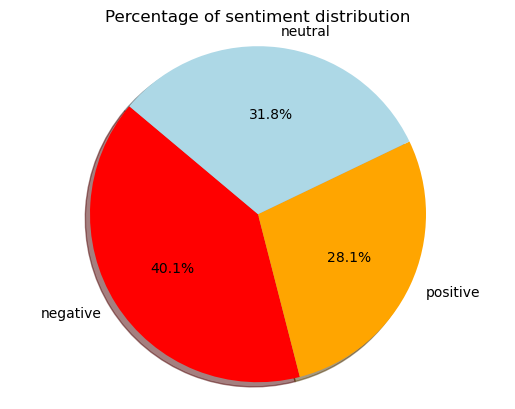

In [157]:
#plot the proportion of sentiments
import matplotlib.pyplot as plt 

labels = ['negative', 'positive', 'neutral']
sizes = [len(negatives), len(positives), len(neutrals)]
colors = ['red', 'orange', 'lightblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)    
plt.axis('equal')
plt.title('Percentage of sentiment distribution')
plt.show()



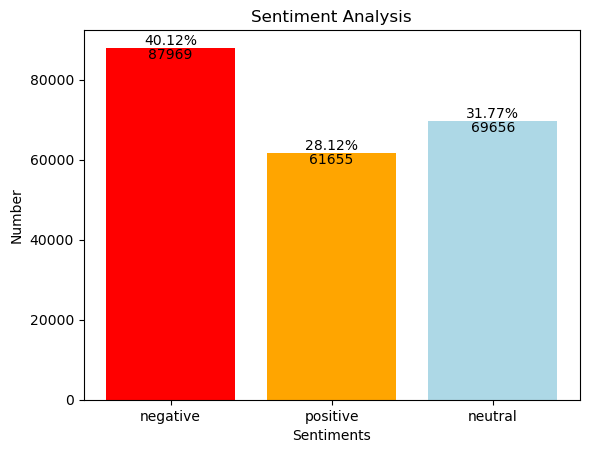

In [158]:
# histogram
import matplotlib.pyplot as plt

labels = ['negative', 'positive', 'neutral']
sizes = [len(negatives), len(positives), len(neutrals)]
colors = ['red', 'orange', 'lightblue']

plt.bar(labels, sizes, color=colors)
#add the percentage of each sentiment in the bars
for i in range(len(sizes)):
    plt.text(i, sizes[i], str(round((sizes[i]/len(sentiments))*100, 2)) + '%', ha='center', va='bottom')  
    plt.text(i, sizes[i], str(sizes[i]), ha='center', va='top')  
    
plt.xlabel('Sentiments')
plt.ylabel('Number')
plt.title('Sentiment Analysis')
plt.show()


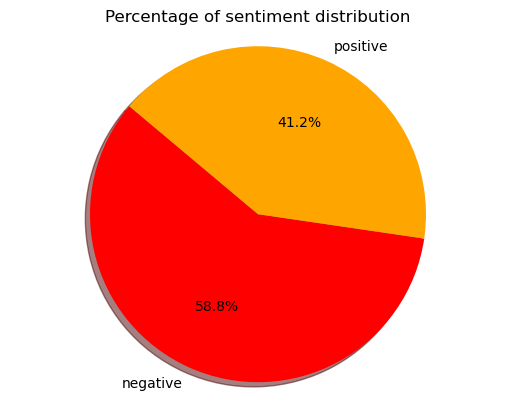

In [159]:
#Considering only positive and negative sentiments
labels = ['negative', 'positive']
sizes = [len(negatives), len(positives)]
colors = ['red', 'orange']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)    
plt.axis('equal')
plt.title('Percentage of sentiment distribution')
plt.show()

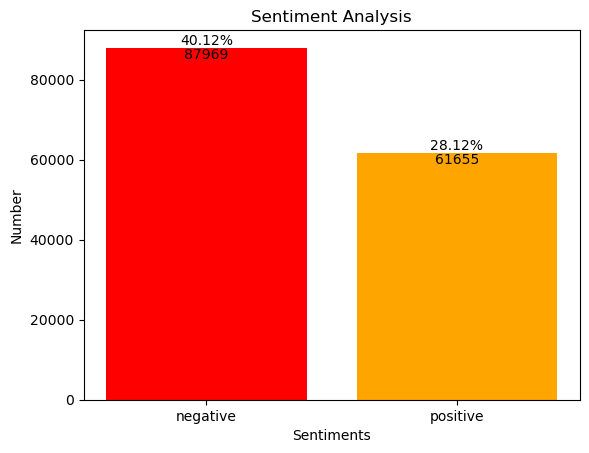

In [160]:
# histogram
import matplotlib.pyplot as plt

labels = ['negative', 'positive']
sizes = [len(negatives), len(positives)]
colors = ['red', 'orange']

plt.bar(labels, sizes, color=colors)
#add the percentage of each sentiment in the bars
for i in range(len(sizes)):
    plt.text(i, sizes[i], str(round((sizes[i]/len(sentiments))*100, 2)) + '%', ha='center', va='bottom')  
    plt.text(i, sizes[i], str(sizes[i]), ha='center', va='top')  
    
plt.xlabel('Sentiments')
plt.ylabel('Number')
plt.title('Sentiment Analysis')
plt.show()


# Word frequecies analysis

In [161]:
# positiv tweets
# negativ tweets
positiv = df[df['label'] == 'positiv']
negativ = df[df['label'] == 'negativ']

In [162]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet_positiv = [tweet.lower().split() for tweet in positiv.tweets]
words_in_tweet_negativ = [tweet.lower().split() for tweet in negativ.tweets]

print(words_in_tweet_positiv[:2])
print(words_in_tweet_negativ[:2])

[['try', 'talking', 'chatgpt', 'new', 'optimized', 'dialogue', 'feedback', 'help', 'improve'], ['chatgpt', 'optimizing', 'language', 'models', 'dialogue', 'machinelearning', 'datascience', 'artificialintelligencenntrending', 'aiml', 'article', 'identified', 'amp', 'digested', 'granola', 'machinedriven', 'rss', 'bot', 'ramsey', 'elbasheer']]
[['chatgpt', 'optimizing', 'language', 'models', 'dialogue', 'openai'], ['openai', 'chatgpt', 'optimizing', 'language', 'models', 'dialoguenl']]


In [163]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

# List of all words across tweets
pos_all_words = list(itertools.chain(*words_in_tweet_positiv))
neg_all_words = list(itertools.chain(*words_in_tweet_negativ))

# Create counter
pos_counts = collections.Counter(pos_all_words)
neg_counts = collections.Counter(neg_all_words)

print(pos_counts.most_common(20))
print(neg_counts.most_common(20))

[('chatgpt', 60679), ('new', 7594), ('openai', 6956), ('like', 6238), ('write', 5098), ('google', 4444), ('its', 4407), ('time', 4337), ('asked', 4127), ('use', 3669), ('questions', 3496), ('ask', 3325), ('code', 3295), ('great', 3139), ('amazing', 3033), ('good', 2883), ('want', 2846), ('chatbot', 2826), ('help', 2805), ('job', 2752)]
[('chatgpt', 83982), ('openai', 7165), ('like', 4534), ('asked', 4388), ('google', 4222), ('write', 4217), ('use', 3451), ('good', 3013), ('chatbot', 2761), ('its', 2494), ('code', 2385), ('think', 2202), ('know', 2191), ('search', 2115), ('people', 2048), ('gpt', 2043), ('going', 1855), ('future', 1824), ('world', 1777), ('better', 1740)]


In [164]:
pos_clean_tweets = pd.DataFrame(pos_counts.most_common(15),
                             columns=['words', 'count'])
neg_clean_tweets = pd.DataFrame(neg_counts.most_common(15),
                             columns=['words', 'count'])

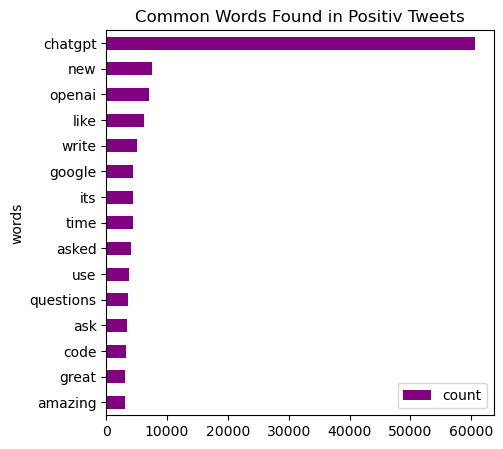

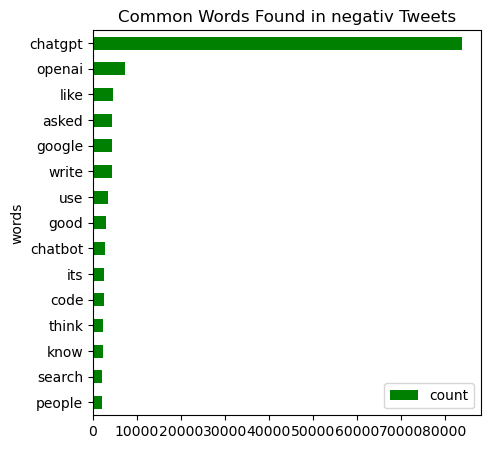

In [165]:
fig, ax = plt.subplots(figsize=(5, 5))

# Plot horizontal bar graph
pos_clean_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Positiv Tweets")

plt.show()

fig, ax = plt.subplots(figsize=(5, 5))

# Plot horizontal bar graph
neg_clean_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in negativ Tweets")

plt.show()

### WordCloud

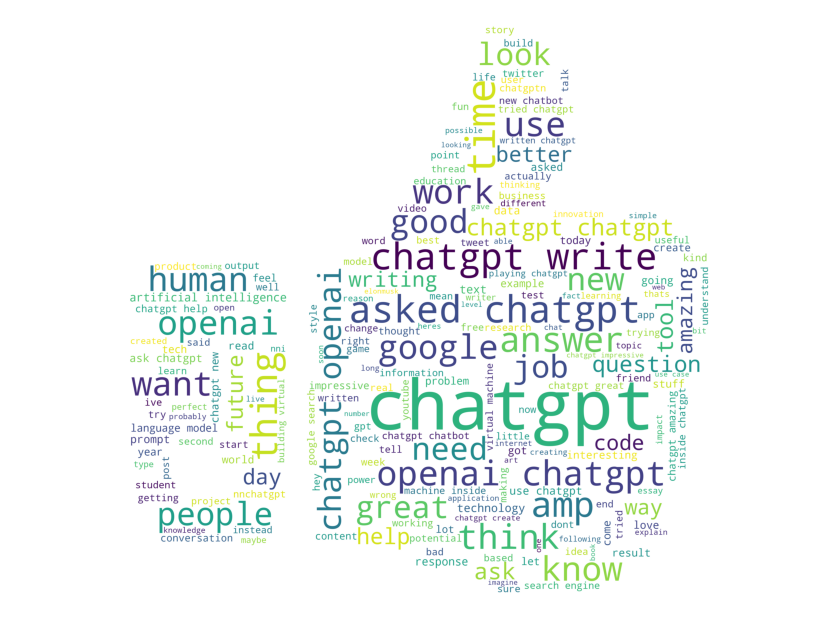

In [151]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
 
comment_words = ''
stopwords = set(STOPWORDS)

p = ", ".join(pos_all_words)

mask = np.array(Image.open("/Users/barbararuvolo/Desktop/EPFL/Digital Musicology/computational-social-media/wordcloud_images/upvote.png"))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10, mask=mask).generate(p)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

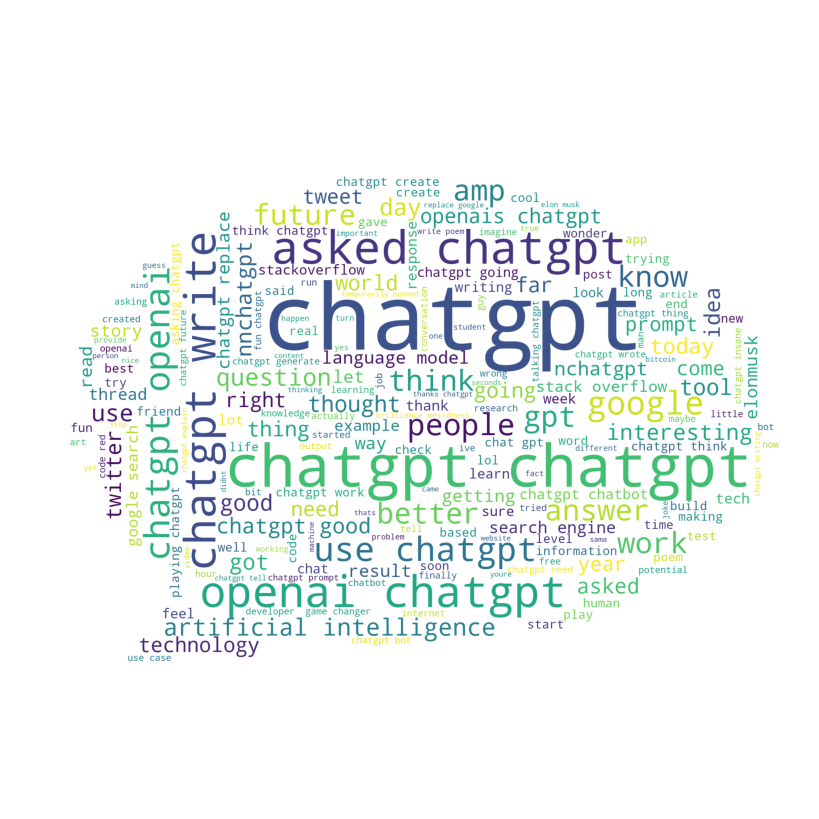

In [167]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
 
comment_words = ''
stopwords = set(STOPWORDS)

n = ", ".join(neg_all_words)
 
mask = np.array(Image.open("/Users/barbararuvolo/Desktop/EPFL/Digital Musicology/computational-social-media/wordcloud_images/comment.png"))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10, mask=mask).generate(n)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### TF-IDF embedding

In [95]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel

#Create a dictionary
dictionary = Dictionary(tokens)
corpus = [dictionary.doc2bow(text) for text in tokens]

model = TfidfModel(corpus)
tfidf_corpus = model[corpus]

In [103]:
dictionary.get(1)

'dialogue'

In [96]:
from gensim.models.ldamodel import LdaModel
coherence_scores = []
num_topics_list = [5, 10, 15, 20, 25, 30]

for num_topics in num_topics_list:
    lda_model = LdaModel(
        corpus=tfidf_corpus,
        id2word=dictionary,
        alpha='auto',
        eta='auto',
        passes=10,
        iterations=500,
        eval_every=None,
        random_state=12345,
        num_topics=num_topics # change this parameter based on the number of topics you want to extract
        )
    
    top_topics = lda_model.top_topics(corpus=tfidf_corpus, texts=df_pos, coherence='c_v', topn=20)
    avg_coherence_score = sum([t[1] for t in top_topics]) / num_topics
    coherence_scores.append(avg_coherence_score)
    print(f"Number of Topics: {num_topics}, Coherence Score: {avg_coherence_score}")

/Users/barbararuvolo/miniconda3/envs/ComputationalSM/lib/python3.10/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
/Users/barbararuvolo/miniconda3/envs/ComputationalSM/lib/python3.10/site-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


Number of Topics: 5, Coherence Score: nan
Number of Topics: 10, Coherence Score: nan
Number of Topics: 15, Coherence Score: nan
Number of Topics: 20, Coherence Score: nan
Number of Topics: 25, Coherence Score: nan
Number of Topics: 30, Coherence Score: nan


In [104]:
top_topics

[([(0.03670397, 'free'),
   (0.019441053, 'project'),
   (0.01903216, 'enjoy'),
   (0.018895175, 'detect'),
   (0.013970935, 'writer'),
   (0.0132895345, 'share'),
   (0.012999995, 'robots'),
   (0.011022215, 'management'),
   (0.010392378, 'easily'),
   (0.010049338, 'academic'),
   (0.009153226, 'minute'),
   (0.009085282, 'left'),
   (0.007991352, 'scripts'),
   (0.00795321, 'limitations'),
   (0.0079407515, 'revolutionize'),
   (0.00791278, 'plus'),
   (0.00704066, 'apparently'),
   (0.0067022177, 'before'),
   (0.0065794247, 'party'),
   (0.006267469, 'automated')],
  nan),
 ([(0.033914, 'writers'),
   (0.02704024, 'email'),
   (0.023786776, 'update'),
   (0.020760547, 'old'),
   (0.018737214, 'driving'),
   (0.017171944, 'sounds'),
   (0.015491812, 'projects'),
   (0.013095719, 'single'),
   (0.009939201, 'codes'),
   (0.009828401, 'sharing'),
   (0.008746454, 'self'),
   (0.008213155, 'original'),
   (0.008050644, 'killer'),
   (0.0074973237, 'speak'),
   (0.006946073, 'realized